In [1]:
#TongBrown Modeling 명사

In [2]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer

In [3]:
ps = PorterStemmer()

In [4]:
#csv파일 읽기
Main_df=pd.read_csv('C:/Users/effor/바탕 화면/통브라운/TongBrown/trans_df.csv')

In [5]:
Main_df.head()

,Unnamed: 0,title,view,u_date,link,e_date
0,0,translation subtitle system war cosmic impact ...,812,202305,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...,202305
1,1,How to send Satoshi to the lightning wallet th...,1.9천,202305,https://youtube.com/watch?v=c6N4JfRePrE&pp=ygU...,202305
2,2,Subprime mortgage crisis to see real estate cr...,262,202305,https://youtube.com/watch?v=BP-uycUPg4M&pp=ygU...,202305
3,3,Economy Prices and Bank Concerns Decline Alph...,963,202305,https://youtube.com/watch?v=4-NEnT9Km1I&pp=ygU...,202305
4,4,Fukushima Pollution Water Related Position Kim...,4.5천,202305,https://youtube.com/watch?v=_5a0i3pw4t0&pp=ygU...,202305


In [6]:
#열마다 추출
titles = list(Main_df['title'])
view = list(Main_df['view'])
u_date = list(Main_df['u_date'])
link = list(Main_df['link'])
e_date = list(Main_df['e_date'])

In [7]:
Word=[]
View=[]
U_date=[]
Link=[]
E_date=[]
Par=[]
i=0

for title in titles:
    tag_list = pos_tag(word_tokenize(title))
    for tl in tag_list:
        doc=tl[0]
        par=tl[1]
#         porter = [porter_stemmer.stem(i) for i in doc]
        por = ps.stem(doc)
        Word.append(por)
        Par.append(par)
        View.append(view[i])
        U_date.append(u_date[i])
        Link.append(link[i])
        E_date.append(e_date[i])
    i = i+1

In [8]:
essendic = {'word':Word, 'part':Par,'link':Link}

In [9]:
essen_df = pd.DataFrame(essendic)

In [10]:
essen_df

,word,part,link
0,translat,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
1,subtitl,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
2,system,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
3,war,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
4,cosmic,JJ,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
...,...,...,...
7915,by,IN,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7916,ai,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7917,sat,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7918,may,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...


In [19]:
n_df=essen_df[essen_df['part'].str.contains('NN')]

In [20]:
n_df

,word,part,link
0,translat,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
1,subtitl,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
2,system,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
3,war,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
5,impact,NN,https://youtube.com/watch?v=iucTJzOImI4&pp=ygU...
...,...,...,...
7913,invest,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7914,new,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7916,ai,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...
7917,sat,NNP,https://youtube.com/watch?v=QZ855HyHWYw&pp=ygU...


In [21]:
nset = set(n_df['word'])
n_list = list(nset)
len(n_list)

1390

In [22]:
n_c =[]
for i in range(len(n_list)):
    n_c.append(len(n_df[n_df['word']==n_list[i]]))

In [23]:
nw_df = pd.DataFrame({'word':n_list, 'count':n_c})

nw_dfs = nw_df.sort_values('count', ascending=False)

len(nw_dfs)

1390

In [24]:
nw_dfs.head(20)

,word,count
334,bank,87
477,new,76
355,rippl,64
1100,coin,56
972,construct,50
1071,stock,46
23,villa,44
854,bitcoin,41
42,price,39
935,sale,39


In [25]:
#워드 클라우드

In [29]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

In [30]:
cand_mask=np.array(Image.open('circle.jpg'))

In [39]:
nword = list(nw_dfs['word'])

In [41]:
ncount = list(nw_dfs['count'])

In [42]:
words = dict(zip(nword,ncount))

In [43]:
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색은 빨간색으로
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(words)

(-0.5, 400.5, 389.5, -0.5)

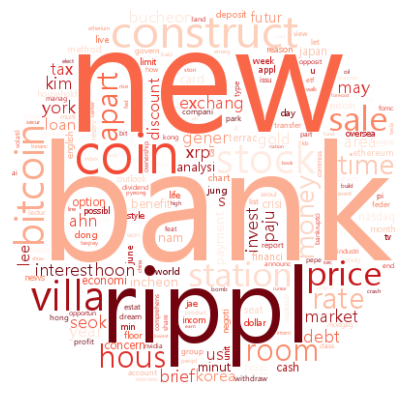

In [44]:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')